In [1]:
#----------------------------------------------
import torch
import swin
import upper_net_mmseg
import torch.nn as nn 
import models
from tensorflow.keras.utils import to_categorical
from glob import glob
import os
import numpy as np
from tqdm import tqdm
from PIL import Image

In [2]:
%load_ext autoreload
%autoreload 2
import custom_dataset
import utils_rs

img_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_origin/train/images"
mask_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/00.processed_masks"
segdataset = custom_dataset.SegDataset(img_path, mask_path, 512,augmentations=None)

In [15]:
# save encoded masks
mask_list = glob(os.path.join(mask_path,"*.png"))

palette = ISAID_PALETTE = {
    0: (0, 0, 0), 1: (0, 0, 63), 2: (0, 63, 63), 3: (0, 63, 0), 4: (0, 63, 127),
    5: (0, 63, 191), 6: (0, 63, 255), 7: (0, 127, 63), 8: (0, 127, 127),
    9: (0, 0, 127), 10: (0, 0, 191), 11: (0, 0, 255), 12: (0, 191, 127),
    13: (0, 127, 191), 14: (0, 127, 255), 15: (0, 100, 155)}


def __mask_encoding__(label):
    label = Image.open(label)
    label = np.asarray(label)
    
    zero_label = np.zeros(label.shape[:2], dtype=np.uint8)
    
    for k,v in palette.items():
        zero_label[np.all(label == v, axis=-1)] = k 
    
    encoded_masks.append(zero_label)

#----

encoded_masks = []

for mask in tqdm(mask_list,desc="mask encoding"):
    __mask_encoding__(mask)

mask encoding:   0%|          | 0/1411 [00:00<?, ?it/s]

mask encoding: 100%|██████████| 1411/1411 [56:46<00:00,  2.41s/it] 


In [18]:
encoded_masks[1]

(1835, 765)

In [19]:
encoded_masks_np = np.array(encoded_masks, dtype=object)

In [24]:
np.save("./mask_processed.npy", encoded_masks_np)

In [26]:
encoded_masks_np_l = np.load("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/mask_processed.npy",allow_pickle=True)

In [31]:
for i,mask_ in enumerate(encoded_masks_np_l):
    im = Image.fromarray( mask_)
    im.save(f"/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/00.processed_masks/{i}.png")
    print(f"{i} / {len(encoded_masks_np_l)}")

0 / 1411
1 / 1411
2 / 1411
3 / 1411
4 / 1411
5 / 1411
6 / 1411
7 / 1411
8 / 1411
9 / 1411
10 / 1411
11 / 1411
12 / 1411
13 / 1411
14 / 1411
15 / 1411
16 / 1411
17 / 1411
18 / 1411
19 / 1411
20 / 1411
21 / 1411
22 / 1411
23 / 1411
24 / 1411
25 / 1411
26 / 1411
27 / 1411
28 / 1411
29 / 1411
30 / 1411
31 / 1411
32 / 1411
33 / 1411
34 / 1411
35 / 1411
36 / 1411
37 / 1411
38 / 1411
39 / 1411
40 / 1411
41 / 1411
42 / 1411
43 / 1411
44 / 1411
45 / 1411
46 / 1411
47 / 1411
48 / 1411
49 / 1411
50 / 1411
51 / 1411
52 / 1411
53 / 1411
54 / 1411
55 / 1411
56 / 1411
57 / 1411
58 / 1411
59 / 1411
60 / 1411
61 / 1411
62 / 1411
63 / 1411
64 / 1411
65 / 1411
66 / 1411
67 / 1411
68 / 1411
69 / 1411
70 / 1411
71 / 1411
72 / 1411
73 / 1411
74 / 1411
75 / 1411
76 / 1411
77 / 1411
78 / 1411
79 / 1411
80 / 1411
81 / 1411
82 / 1411
83 / 1411
84 / 1411
85 / 1411
86 / 1411
87 / 1411
88 / 1411
89 / 1411
90 / 1411
91 / 1411
92 / 1411
93 / 1411
94 / 1411
95 / 1411
96 / 1411
97 / 1411
98 / 1411
99 / 1411
100 / 1411

In [32]:
qw= "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/00.processed_masks/0.png"
aa = Image.open(qw)

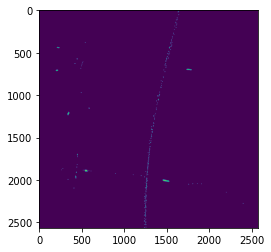

In [33]:
import matplotlib.pyplot as plt
plt.imshow(aa)


In [35]:
aw = np.asarray(aa)
np.unique(aw)
aw.shape

(2563, 2579)

In [39]:
image, mask = segdataset.__getitem__(0)